In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 20.3MB/s]

Extracting files...
Path to dataset files: C:\Users\hemes\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [3]:
df = pd.read_csv("books.csv")

In [4]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [6]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [7]:
df.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

Text(0.5, 23.52222222222222, 'count')

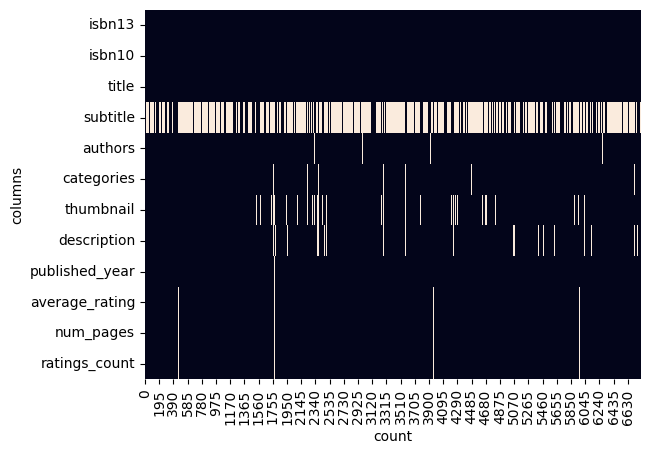

In [17]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax = ax)
plt.ylabel("columns")
plt.xlabel("count")

There is a pattern where if the ratings count, nums, average rating is missing for the same books, so we should check whether data has same bias or not

In [19]:
df["missing_description"] = np.where(df['description'].isna(), 1, 0)
df["age_of_book"] = 2025 - df['published_year']

In [20]:
df.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0


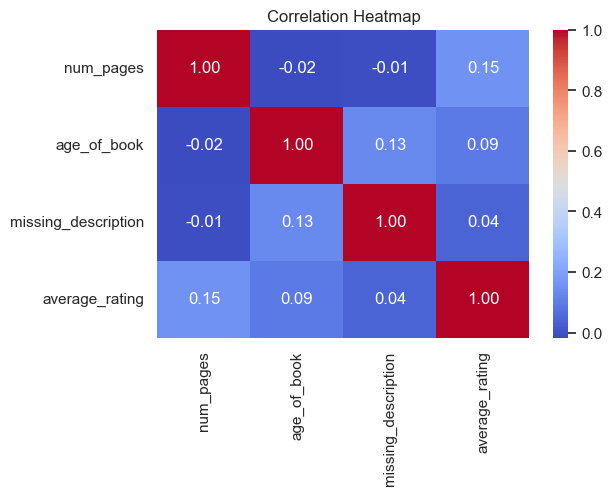

In [23]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_mat = df[columns_of_interest].corr(method= "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(6, 4))

heatmap = sns.heatmap(correlation_mat, cmap="coolwarm", annot=True, fmt=".2f")
heatmap.set_title("Correlation Heatmap")
plt.show(heatmap)

In [28]:
books_missing = df[
    ~ (df["description"].isna()) &
    ~ (df["num_pages"].isna()) &
    ~ (df["average_rating"].isna()) &
    ~ (df["published_year"].isna())     
]

In [30]:
books_missing.isna().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age_of_book               0
dtype: int64

In [ ]:
books_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False) 

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


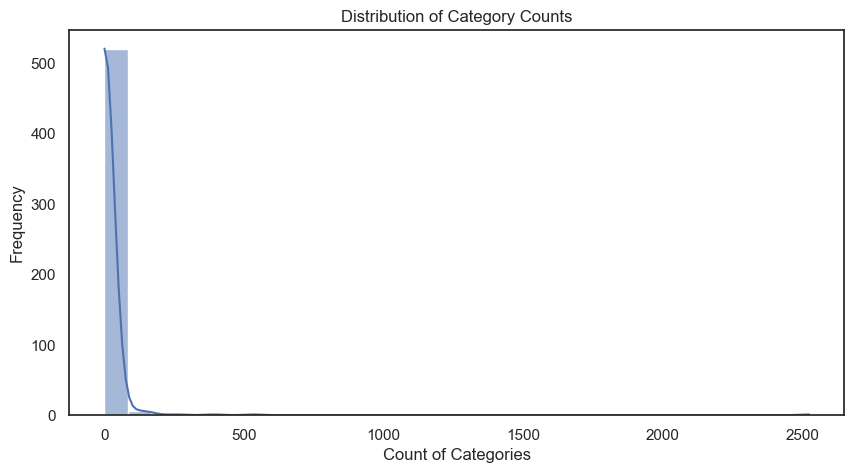

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


category_counts = books_missing['categories'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(category_counts, bins=30, kde=True)
plt.xlabel("Count of Categories")
plt.ylabel("Frequency")
plt.title("Distribution of Category Counts")
plt.show()


In [42]:
books_missing['description'].str.split().str.len()

0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: description, Length: 6507, dtype: int64

In [43]:
books_missing['words_in_description'] = books_missing['description'].str.split().str.len()

C:\Users\hemes\AppData\Local\Temp\ipykernel_340\919583008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing['words_in_description'] = books_missing['description'].str.split().str.len()


In [44]:
books_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45


<Axes: xlabel='words_in_description', ylabel='Count'>

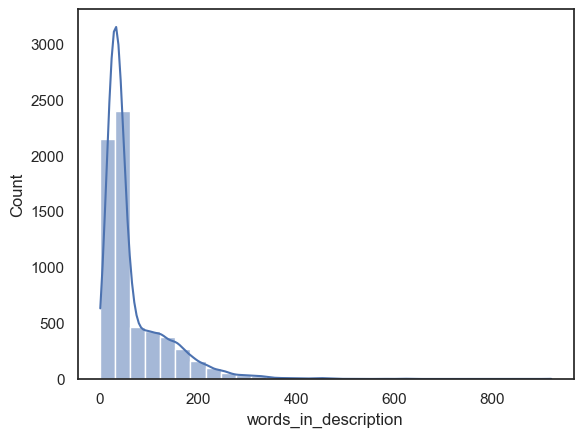

In [54]:
sns.histplot(books_missing['words_in_description'], bins = 30, kde= True)


In [62]:
books_missing.loc[books_missing['words_in_description'].between(1, 4)]["description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [64]:
books_missing.loc[books_missing['words_in_description'].between(5, 14)]["description"].head()

2     Volume Two of Stephen Donaldson's acclaimed se...
38    Koko is Peter Straub's foray into the psycholo...
70    A matter of life and death - and the Throne of...
77                       Nonsense rhyming story. 4 yrs+
84    A study guide for the novel There's a Boy in t...
Name: description, dtype: object

In [69]:
books_missing.loc[books_missing['words_in_description'].between(15, 24)]["description"].head(5)

10    One of Sidney Sheldon's most popular and bests...
32    Tells the story of three generations of Chines...
36    A magical and fantastic collection of early st...
57    A young drifter finds more than he bargained f...
68    A new 'The Doors of Perception' for the 21st c...
Name: description, dtype: object

In [70]:
books_missing.loc[books_missing['words_in_description'].between(25, 34)]["description"].head()

9     Kate Blackwell is an enigma and one of the mos...
14    Available in the U.S. for the first time, this...
20    It is 1937, and Charles Ashworth, a Canon to t...
21    Reissue of the author's most famous and well-l...
46    No one believes a little girl when she insists...
Name: description, dtype: object

In [76]:
books_missing_25_words = books_missing[books_missing['words_in_description'] >= 25]
books_missing_25_words.shape

(5197, 15)

In [77]:
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words['subtitle'].isna(), books_missing_25_words['title'],
             books_missing_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis = 1))
)

books_missing_25_words.head()

C:\Users\hemes\AppData\Local\Temp\ipykernel_340\201684506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain


In [78]:
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1)

C:\Users\hemes\AppData\Local\Temp\ipykernel_340\3840857314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1)


In [79]:
books_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [80]:

books_missing_25_words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1).to_csv("books_cleaned.csv", index = False)